In [1]:
#import necessary libraries needed for analysis

import csv
import json
import os,sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing 
## Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv, ...) you have been given the following tasks: 

# QUESTION 1, 2, 4, 5

In [2]:
#QUESTION 1, 2, 4, 5
processed_list = []
retire = []
employ = []

with open("acw_user_data.csv", mode = 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter =',')
    for line in csv_reader:
        
        k1 = ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
        vehicle_list = [line[x] for x in k1]
        vehicle_key = ['make', 'model', 'year', 'type']
        new_vehicle = dict(zip(vehicle_key, vehicle_list))

        k2 = ['Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Bank IBAN']
        Credit_card_list = [line[x] for x in k2]
        Credit_card_key = ['start_date', 'end_date', 'number', 'cvv','iban']
        new_Credit_card = dict(zip(Credit_card_key, Credit_card_list))

        k3 = ['Address Street', 'Address City', 'Address Postcode']
        Address_list = [line[x] for x in k3]
        Address_key = ['street', 'city', 'postcode']
        new_Address = dict(zip(Address_key, Address_list))
        
        if line['Dependants'] == '' or "":
            line['Dependants'] = 0
       
    
        # rename, re-arrange the dictionary keys and changing datatypes of the dictionary values from strings to their respective datatype
        renamed_dict = {
            'first_name': line['First Name'], 
            'last_name': line['Last Name'], 
            'age': int(line['Age (Years)']), 
            'sex': line['Sex'],
            'retired': json.loads(line['Retired'].lower()),
            'marital_status': line['Marital Status'],
            'dependants': int(line['Dependants']),
            'salary': int(line['Yearly Salary (£)']),
            'pension': int(line['Yearly Pension (£)']),
            'company': line['Employer Company'],
            'commute_distance': float(line['Distance Commuted to Work (miles)'])   
        }
        
        # updating renamed_dict dictionary with the nested dictionary created
        renamed_dict['Vehicle'] = new_vehicle
        renamed_dict['Credit Card'] = new_Credit_card
        renamed_dict['Address'] = new_Address
        
        #changing datatypes of the nested dictionary values from strings to integers
        try:
            renamed_dict['Credit Card']['number'] = int(renamed_dict['Credit Card']['number'])
            renamed_dict['Credit Card']['cvv'] = int(renamed_dict['Credit Card']['cvv'])
        except Exception as err:
            print(err)
        
        #storing renamed_dict info in a list called processed_list  
        processed_list.append(renamed_dict)
        
        #extracting retired customers and employed customers from the dict
        if renamed_dict['retired']:
            retire.append(renamed_dict)
        else:
            employ.append(renamed_dict)

print(processed_list)            
print(retire)
print(employ)

#dumping processed_list, retire and employ in it's respective json file         
with open('processed.json',mode = 'w') as processed:
    json.dump(processed_list,processed, indent = 4)

with open('retired.json',mode = 'w') as retire_data:
    json.dump(retire, retire_data, indent = 4)
    
with open('employed.json',mode = 'w') as employ_data:
    json.dump(employ, employ_data, indent = 4)

[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': True, 'marital_status': 'married or civil partner', 'dependants': 3, 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': '2009', 'type': 'Pickup'}, 'Credit Card': {'start_date': '08/18', 'end_date': '11/27', 'number': 676373692463, 'cvv': 875, 'iban': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': '1996', 'type': 'Coupe'}, 'Credit Card': {'start_date': '08/12', 'end_date': '11/26', 'number': 4529436854129855, 'cvv': 583, 'iban': 'GB37UMCO54540228728019'}, 'Ad

# QUESTION 3

In [3]:
#QUESTION 3
empty_list = []

with open("acw_user_data.csv", mode = 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter =',')
    
    for index,line in enumerate (csv_reader):
            for value in line.values():
                if value == '' or "":
                    empty_list.append(index)
                
print('The Problematic rows for dependants:', empty_list)

The Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


# QUESTION 6

In [4]:
#FUNCTION
def RemoveCreditCard():
    """
    This is a function to remove entries with
    a difference of 10 years between the end and
    start date in the credit card entry.
    
    """
    removeCard = []
    with open("acw_user_data.csv", mode = 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter =',')
        for data in csv_reader:
    
            start = data['Credit Card Start Date'].split('/')
            end = data['Credit Card Expiry Date'].split('/')

            start_year = int( start[1] )
            start_month = int( start[0] )
            end_year = int( end[1] )
            end_month = int( end[0] )

            if ((end_month >= start_month) and (end_year - start_year) >= 10) or ((end_month < start_month) and (end_year - start_year >10)):
                removeCard.append(data)

    return removeCard


## Initialise the RemoveCreditCard function on the cleaned csv file.

In [5]:
#Initialise the RemoveCreditCard function on the cleaned csv file.

remove_card = []
csv_reader = RemoveCreditCard()
for line in csv_reader:

    k1 = ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
    vehicle_list = [line[x] for x in k1]
    vehicle_key = ['make', 'model', 'year', 'type']
    new_vehicle = dict(zip(vehicle_key, vehicle_list))

    k2 = ['Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV','Bank IBAN']
    Credit_card_list = [line[x] for x in k2]
    Credit_card_key = ['start_date', 'end_date', 'number', 'cvv','iban']
    new_Credit_card = dict(zip(Credit_card_key, Credit_card_list))

    k3 = ['Address Street', 'Address City', 'Address Postcode']
    Address_list = [line[x] for x in k3]
    Address_key = ['street', 'city', 'postcode']
    new_Address = dict(zip(Address_key, Address_list))

    if line['Dependants'] == '' or "":
        line['Dependants'] = 0


    # rename, re-arrange the dictionary keys and changing datatypes of the dictionary values from strings to their respective datatype
    renamed_dict = {
        'first_name': line['First Name'], 
        'last_name': line['Last Name'], 
        'age': int(line['Age (Years)']), 
        'sex': line['Sex'],
        'retired': json.loads(line['Retired'].lower()),
        'marital_status': line['Marital Status'],
        'dependants': int(line['Dependants']),
        'salary': int(line['Yearly Salary (£)']),
        'pension': int(line['Yearly Pension (£)']),
        'company': line['Employer Company'],
        'commute_distance': float(line['Distance Commuted to Work (miles)'])

    }
    # updating renamed_dict dictionary with the nested dictionary created
    renamed_dict['Vehicle'] = new_vehicle
    renamed_dict['Credit Card'] = new_Credit_card
    renamed_dict['Address'] = new_Address


    #changing datatypes of the nested dictionary values from strings to integers
    try:
        renamed_dict['Credit Card']['number'] = int(renamed_dict['Credit Card']['number'])
        renamed_dict['Credit Card']['cvv'] = int(renamed_dict['Credit Card']['cvv'])
    except Exception as err:
        print(err)
        
    #storing remove_careditcard info in renamed_dict in a list called remove_card
    remove_card.append(renamed_dict)

print(remove_card)

#dumping remove_card in it's respective json file
with open('remove_ccard.json',mode = 'w') as remove:
    json.dump(remove_card,remove, indent = 4)

[{'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': '1996', 'type': 'Coupe'}, 'Credit Card': {'start_date': '08/12', 'end_date': '11/26', 'number': 4529436854129855, 'cvv': 583, 'iban': 'GB37UMCO54540228728019'}, 'Address': {'street': '00 Wheeler wells', 'city': 'Chapmanton', 'postcode': 'L2 7BT'}}, {'first_name': 'Julian', 'last_name': 'Potter', 'age': 43, 'sex': 'Male', 'retired': False, 'marital_status': 'single', 'dependants': 3, 'salary': 96645, 'pension': 0, 'company': 'Clark Group', 'commute_distance': 20.05, 'Vehicle': {'make': 'Lexus', 'model': 'S-Series', 'year': '1998', 'type': 'Van/Minivan'}, 'Credit Card': {'start_date': '07/12', 'end_date': '03/29', 'number': 36970652008212, 'cvv': 622, 'iban': 'GB92PWOB18937027850061'}, 'Address

# QUESTION 7

In [6]:
#QUESTION 7
from operator import itemgetter

with open('processed.json',mode = 'r') as processed:
    data_processed = json.load(processed)
    for data in data_processed:
        if data['commute_distance'] <= 1.0:
            new_column = data['salary']
        else:
            new_column = data['salary']/data['commute_distance']
        
        #add the Salary-column to the existing list of dictionaries
        data['Salary-Commute'] = new_column
        
        
#sorting the new_value 'salary-commute' in an accending order in the dictionary using itemgetter to grab the key from the list of dict 
sort_by_salary_commute = sorted(data_processed, key=itemgetter('Salary-Commute'), reverse=False)

print(sort_by_salary_commute)

#dumping sort_by_salary_commute in it's respective json file
with open('commute.json',mode = 'w') as commute_data:
    json.dump(sort_by_salary_commute, commute_data, indent = 4)

[{'first_name': 'Graeme', 'last_name': 'Jackson', 'age': 52, 'sex': 'Male', 'retired': False, 'marital_status': 'single', 'dependants': 2, 'salary': 17046, 'pension': 0, 'company': 'Smith, Birch and Burke', 'commute_distance': 5.52, 'Vehicle': {'make': 'Chevrolet', 'model': 'Rally Wagon 1500', 'year': '2011', 'type': 'SUV'}, 'Credit Card': {'start_date': '06/14', 'end_date': '04/29', 'number': 4713424668774153, 'cvv': 3053, 'iban': 'GB09ELJH35362236053720'}, 'Address': {'street': 'Studio 9 Reid lights', 'city': 'South Ryan', 'postcode': 'E27 9GY'}, 'Salary-Commute': 3088.04347826087}, {'first_name': 'Janet', 'last_name': 'Quinn', 'age': 30, 'sex': 'Female', 'retired': False, 'marital_status': 'married or civil partner', 'dependants': 1, 'salary': 17428, 'pension': 0, 'company': 'Wood-Davies', 'commute_distance': 5.64, 'Vehicle': {'make': 'Audi', 'model': 'Land Cruiser', 'year': '2000', 'type': 'SUV'}, 'Credit Card': {'start_date': '02/12', 'end_date': '02/25', 'number': 180012621284154

# Data Visualisation
## Using Pandas and Seaborn 

In [7]:
#loading data using pandas
data = pd.read_csv('acw_user_data.csv')

In [8]:
#load first five rows in the dataset 
data.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [9]:
#check shape of the data
data.shape

(1000, 23)

In [10]:
#check information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Address Street                     1000 non-null   object 
 1   Address City                       1000 non-null   object 
 2   Address Postcode                   1000 non-null   object 
 3   Age (Years)                        1000 non-null   int64  
 4   Distance Commuted to Work (miles)  1000 non-null   float64
 5   Employer Company                   754 non-null    object 
 6   Credit Card Start Date             1000 non-null   object 
 7   Credit Card Expiry Date            1000 non-null   object 
 8   Credit Card Number                 1000 non-null   int64  
 9   Credit Card CVV                    1000 non-null   int64  
 10  Dependants                         981 non-null    float64
 11  First Name                         1000 non-null   object

# 1.Obtain the Data Series for Salary, and Age, and calculate the following: 
## a.Mean Salary 

In [11]:
salary = data['Yearly Salary (£)']
print(salary) 

print('\n' + f'Mean Salary of Customer is {salary.mean()}')

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (£), Length: 1000, dtype: int64

Mean Salary of Customer is 57814.078


## b.Median Age 

In [12]:
age = data['Age (Years)']
print(age) 

print('\n' + f'Median Age of Customer is {age.median()}')

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

Median Age of Customer is 54.0


# 2.Perform univariate plots of the following data attributes: 
## a.Age, calculating how many bins would be required for a bin_width of 5. 

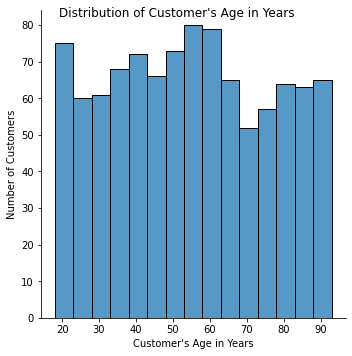

In [13]:
#calculating how many bins would be required for a bin_width of 5 in the age column. 
plot2a = sns.displot(data['Age (Years)'], binwidth = 5)
plot2a.fig.suptitle("Distribution of Customer's Age in Years")
plot2a.set_axis_labels("Customer's Age in Years","Number of Customers")

According to the Distribution of Customer's Age in Years plot above, 15 Bins is required for a bin_width of 5.

## b.Dependents, fixing data errors with seaborn itself. 

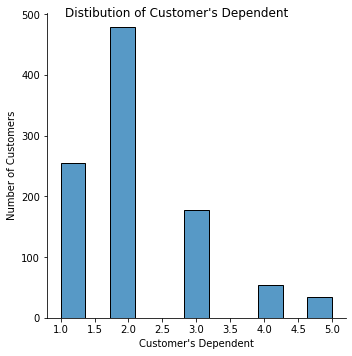

In [14]:
#Dependents, fixing data errors
data['Dependants'] = data['Dependants'].fillna(data['Dependants'].mode()[0])

plot2b = sns.displot(data['Dependants'])
plot2b.fig.suptitle("Distibution of Customer's Dependent")
plot2b.set_axis_labels("Customer's Dependent","Number of Customers")

## c.Age (of default bins), conditioned on Marital Status 

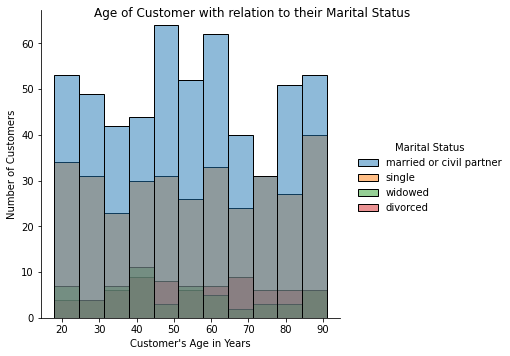

In [15]:
#calculating Age (of default bins), conditioned on Marital Status 
plot2c = sns.displot(data = data, x = 'Age (Years)', hue = 'Marital Status')
plot2c.fig.suptitle("Age of Customer with relation to their Marital Status")
plot2c.set_axis_labels("Customer's Age in Years","Number of Customers")

# 3.Perform multivariate plots with the following data attributes: 
## a.Commuted distance against salary. 

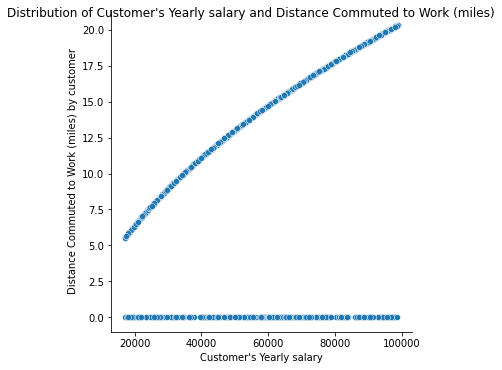

In [16]:
#plotting Commuted distance against salary.  
plot3a = sns.relplot(data = data, y ='Distance Commuted to Work (miles)', x = 'Yearly Salary (£)')

plot3a.fig.suptitle("Distribution of Customer's Yearly salary and Distance Commuted to Work (miles)")
plot3a.set_axis_labels("Customer's Yearly salary","Distance Commuted to Work (miles) by customer")

## b.Age against Salary 

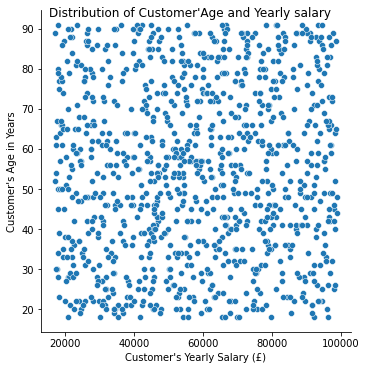

In [17]:
#b.Age against Salary 
plot3b = sns.relplot(data = data, y ='Age (Years)', x = 'Yearly Salary (£)')

plot3b.fig.suptitle("Distribution of Customer'Age and Yearly salary")
plot3b.set_axis_labels("Customer's Yearly Salary (£)","Customer's Age in Years")

## c.Age against Salary conditioned by Dependants 

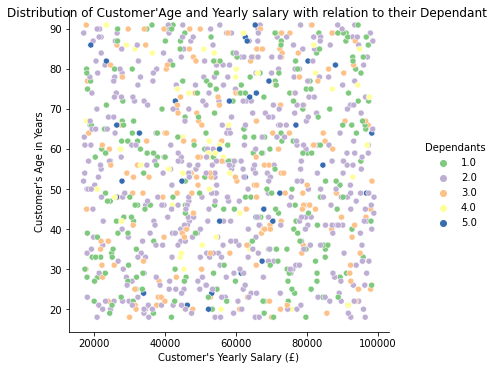

In [18]:
#c.Age against Salary conditioned by Dependants
plot3c = sns.relplot(data = data, y ='Age (Years)', x = 'Yearly Salary (£)', hue = 'Dependants', palette = "Accent")

plot3c.fig.suptitle("Distribution of Customer'Age and Yearly salary with relation to their Dependant")
plot3c.set_axis_labels("Customer's Yearly Salary (£)","Customer's Age in Years")

# 4.Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this. 

In [19]:
figures_to_save = {}
figures_to_save["./Distribution of Customer's Age in Years.png"] = plot2a
figures_to_save["./Distibution of Customer's Dependent.png"] = plot2b
figures_to_save["./Age of Customer with relation to their Marital Status.png"] = plot2c
figures_to_save["./Distribution of Customer's Yearly salary and Distance Commuted to Work (miles).png"] = plot3a
figures_to_save["./Distribution of Customer'Age and Yearly salary.png"] =  plot3b
figures_to_save["./Distribution of Customer'Age and Yearly salary with relation to their Dependant.png"] = plot3c

In [20]:
for k,v in figures_to_save.items():
    v.savefig(k)